 ## Objective

1. Understand the Dataset & cleanup (if required).
2. Build Regression models to predict the sales w.r.t single & multiple features.
3. Also evaluate the models & compare their respective scores like R2, RMSE, etc.






Linear Regression is a method used to measure the degree at which more than one independent
variable (predictors) and more than one dependent variable (responses), are linearly related. The method
is broadly used to predict the behavior of the response variables associated to changes in the predictor
variables, once a desired degree of relation has been established.


Importing the necessary libraries for computation.

Numpy contains a multi-dimensional array and data structures.

Pandas helps to manipulate and analyse data.

Pyplot module in matplotlib is imported to plot and analyse the data as well as the outcome.


## ***1. Importing package and data ***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart.csv


In [ ]:
# importing data in pandas
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['Walmart.csv']))
# finding Row and Column of data
print('\nNumber of rows and columns in the data set: ',dataframe.shape)



Number of rows and columns in the data set:  (6435, 8)


In [ ]:
# All data 
dataframe

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# importing top 5 data 
dataframe.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## **2. Data Understanding**

The above dataset is the historical data of Walmart that cover the sales from 2010/02/05 to 2012/11/01. The main objective of the dataset is to find the sales including the economic factors like CPI(Consumer Price Index), Unemployment Index, Fuel Price etc. 

The dataset contains 7 columns where Store is the nukmber of store, Date is the week sale data, Weekly_Sales is the sales for the given store, Holiday_Flag whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week, Temperature is the temperature of the day of the sales, Fuel Price which is the price of the fuel in that region, CPI is the consumer price index, Unemployment is the prevailing unemployment rate.  

###Source
The dataset is taken from kaggle and below is the link below to access the dataset.

https://www.kaggle.com/yasserh/walmart-dataset

 ## **3. Data Analysis**

In [ ]:
# Converting Date datatype from object to datatime

dataframe.Date = pd.to_datetime(dataframe.Date) 
dataframe.Date.dtype

dtype('<M8[ns]')

In [ ]:
dataframe['year'], dataframe['month'] = dataframe['Date'].dt.year, dataframe['Date'].dt.month
dataframe.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
1269,9,2012-06-29,544770.70,0,87.18,3.286,225.592105,5.539,2012,6
1338,10,2011-01-28,1715769.05,0,53.03,3.231,127.580032,8.744,2011,1
430,4,2010-12-02,2188307.39,1,28.84,2.573,126.496258,8.623,2010,12
4465,32,2010-09-17,1043962.36,0,67.17,2.800,190.468829,9.017,2010,9
3514,25,2011-02-09,699779.00,0,67.20,3.703,208.962516,7.274,2011,2


In [ ]:
# Checking top 10 sales
dataframe[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price']].nlargest(10,'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price
1905,14,2010-12-24,3818686.45,0,30.59,3.141
2763,20,2010-12-24,3766687.43,0,25.17,3.141
1333,10,2010-12-24,3749057.69,0,57.06,3.236
527,4,2011-12-23,3676388.98,0,35.92,3.103
1762,13,2010-12-24,3595903.20,0,34.90,2.846
1814,13,2011-12-23,3556766.03,0,24.76,3.186
2815,20,2011-12-23,3555371.03,0,40.19,3.389
475,4,2010-12-24,3526713.39,0,43.21,2.887
1385,10,2011-12-23,3487986.89,0,48.36,3.541
189,2,2010-12-24,3436007.68,0,49.97,2.886


###### From above data we can see that Store 14 has the most weekly_sales, while store 20,10,13,4 have are in top 10 twice 

In [ ]:
# Converting numerical data into catrgorical data
dataframe.Store = pd.Categorical(dataframe.Store)
dataframe.Store.dtype

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
, ordered=False)

In [ ]:
dataframe['Holiday_Flag'] = pd.Categorical(dataframe.Holiday_Flag)
dataframe.Holiday_Flag.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
# Printing the maximum of the date column
print("Maximum date is", dataframe.Date.max())

# Printing the minimum of the date column
print("Minimum date is",dataframe.Date.min())

Maximum date is 2012-12-10 00:00:00
Minimum date is 2010-01-10 00:00:00


In [ ]:
# A custom In Quartile Range function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
print(dataframe[["Temperature", "Fuel_Price", "Unemployment"]].agg([iqr,np.mean,np.median]))

        Temperature  Fuel_Price  Unemployment
iqr       27.480000    0.802000      1.731000
mean      60.663782    3.358607      7.999151
median    62.670000    3.445000      7.874000


In [ ]:
# Sort sales_1_1 by date
sales_1_1 = dataframe.sort_values('Date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1.Weekly_Sales.cumsum()

# Get the max of weekly_sales, add as cum_max_sales col
sales_1_1['max_sales'] = sales_1_1.Weekly_Sales.max()

# See the columns we calculated
sales_1_1[["Date", "Weekly_Sales", "cum_weekly_sales", "max_sales"]]

,Date,Weekly_Sales,cum_weekly_sales,max_sales
606,2010-01-10,283178.12,2.831781e+05,3818686.45
2036,2010-01-10,566945.95,8.501241e+05,3818686.45
5897,2010-01-10,481523.93,1.331648e+06,3818686.45
4610,2010-01-10,224294.39,1.555942e+06,3818686.45
5039,2010-01-10,422169.47,1.978112e+06,3818686.45
...,...,...,...,...
5860,2012-12-10,1409544.97,6.732415e+09,3818686.45
2285,2012-12-10,491817.19,6.732907e+09,3818686.45
1427,2012-12-10,1713889.11,6.734621e+09,3818686.45
3572,2012-12-10,697317.41,6.735318e+09,3818686.45


In [ ]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = dataframe[dataframe['Holiday_Flag'] == 1].drop_duplicates(subset = 'Date')

# Print date col of holiday_dates
holiday_dates.Date

1     2010-12-02
31    2010-10-09
42    2010-11-26
47    2010-12-31
53    2011-11-02
83    2011-09-09
94    2011-11-25
99    2011-12-30
105   2012-10-02
135   2012-07-09
Name: Date, dtype: datetime64[ns]

In [ ]:
Store = dataframe.groupby(['Store']).agg({'Weekly_Sales':['mean','max','sum']})
Store[:5]

Weekly_Sales                          
               mean         max           sum
Store                                        
1      1.555264e+06  2387950.20  2.224028e+08
2      1.925751e+06  3436007.68  2.753824e+08
3      4.027044e+05   605990.41  5.758674e+07
4      2.094713e+06  3676388.98  2.995440e+08
5      3.180118e+05   507900.07  4.547569e+07

###### Now Plotting the data into different charts

Plotting the correlation in a seaborn heatmap to find out which features are more related to each other
and which are not.


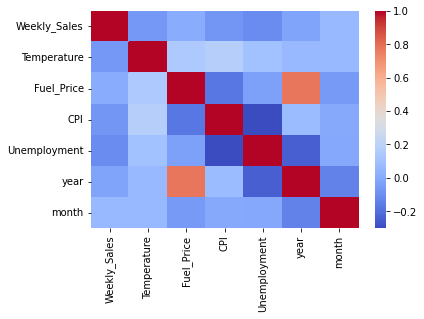

In [ ]:
sns.heatmap(dataframe.corr(), cmap='coolwarm')
plt.show()

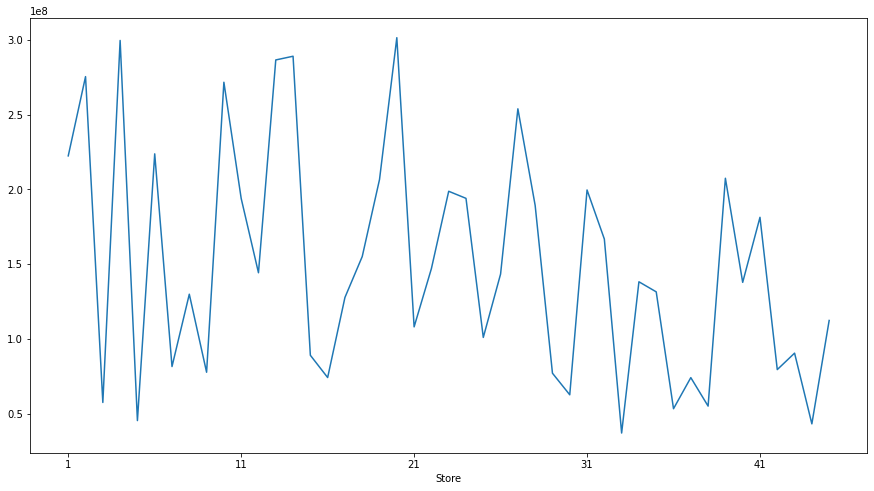

In [ ]:
# Line chart to view trend across stores for Total weekly_sales column
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'sum')].plot()
plt.show()

###### Presenting in Bar Graph for better Explanation

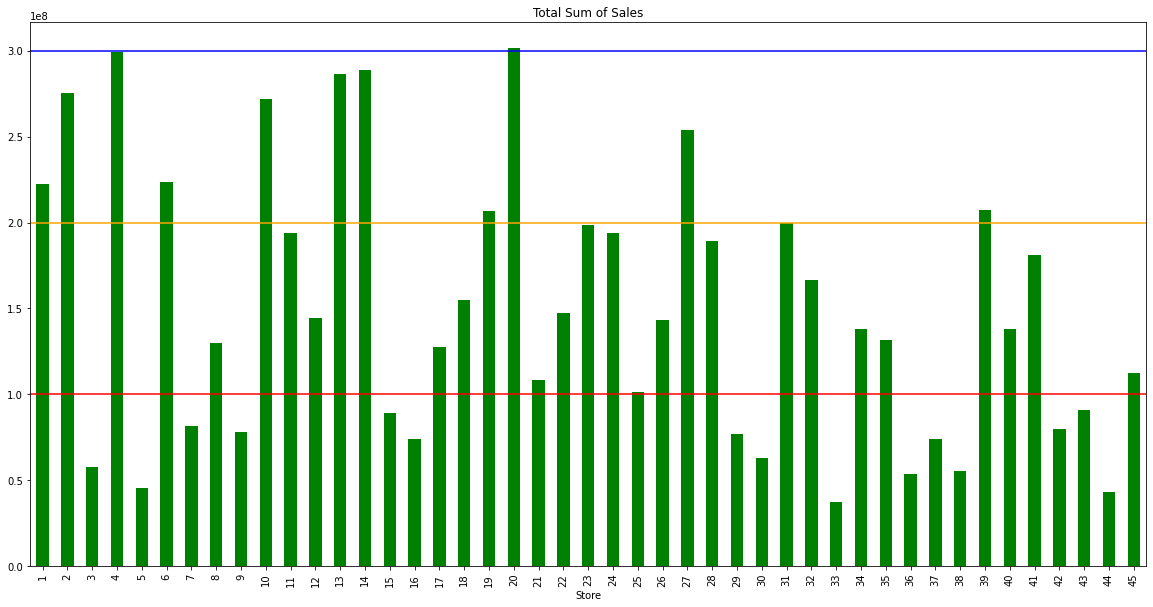

In [ ]:
plt.figure(figsize = (20,10))
Store[('Weekly_Sales',  'sum')].plot(kind = 'bar',color = 'green')
#plt.xticks(rotation = 0)
plt.title('Total Sum of Sales')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=300000000,color = 'blue')
plt.show()

A bar plot is much more conclusive and we get the following observations


*   Stores getting total sales below the redline are underperforming.
*   Stores between red and orange are average.
*   Stores between orange and green are performing above average.
*   Stores touching the green line are very well performing.

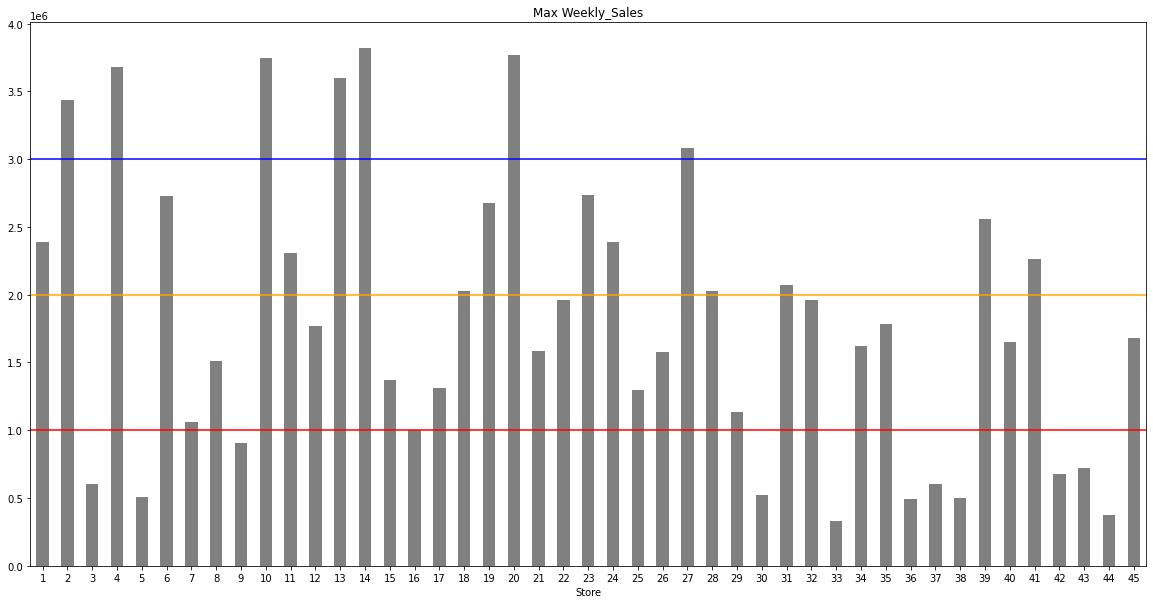

In [ ]:
# Simlimarly we can find the Maximum Weekly Sales for each store
plt.figure(figsize = (20,10))
Store[('Weekly_Sales',  'max')].plot(kind = 'bar',color = 'gray')
plt.xticks(rotation = 0)
plt.title('Max Weekly_Sales')
plt.axhline(y=1000000,color = 'red')
plt.axhline(y=2000000,color = 'orange')
plt.axhline(y=3000000,color = 'blue')
plt.show()

A bar plot is much more conclusive and we get the following observations


*   Normally Weekly Sales of most Store is above orange line are average.
*   Stores between red and orange are average.
*   Stores between orange and blue are performing above average.
*   Only 7 Stores touching the blue line are very well performing.

Using the Holiday_flag column to check Weekly_sales
12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\ Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\ Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\ Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [ ]:
# check for total values in Holiday_Flag column
dataframe.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [ ]:
Store_new = dataframe.groupby(['Store','Holiday_Flag']).agg({'Weekly_Sales':['mean','max','sum']})
Store_new = Store_new.reset_index()
Store_new

Store Holiday_Flag  Weekly_Sales                          
                               mean         max           sum
0      1            0  1.546957e+06  2387950.20  2.057453e+08
1      1            1  1.665748e+06  2033320.66  1.665748e+07
2      2            0  1.914209e+06  3436007.68  2.545898e+08
3      2            1  2.079267e+06  2658725.29  2.079267e+07
4      3            0  4.000648e+05   605990.41  5.320862e+07
..   ...          ...           ...         ...           ...
85    43            1  6.359463e+05   722120.04  6.359463e+06
86    44            0  3.032536e+05   376233.89  4.033273e+07
87    44            1  2.960356e+05   338737.33  2.960356e+06
88    45            0  7.821985e+05  1682862.03  1.040324e+08
89    45            1  8.362937e+05  1182500.16  8.362937e+06

[90 rows x 5 columns]

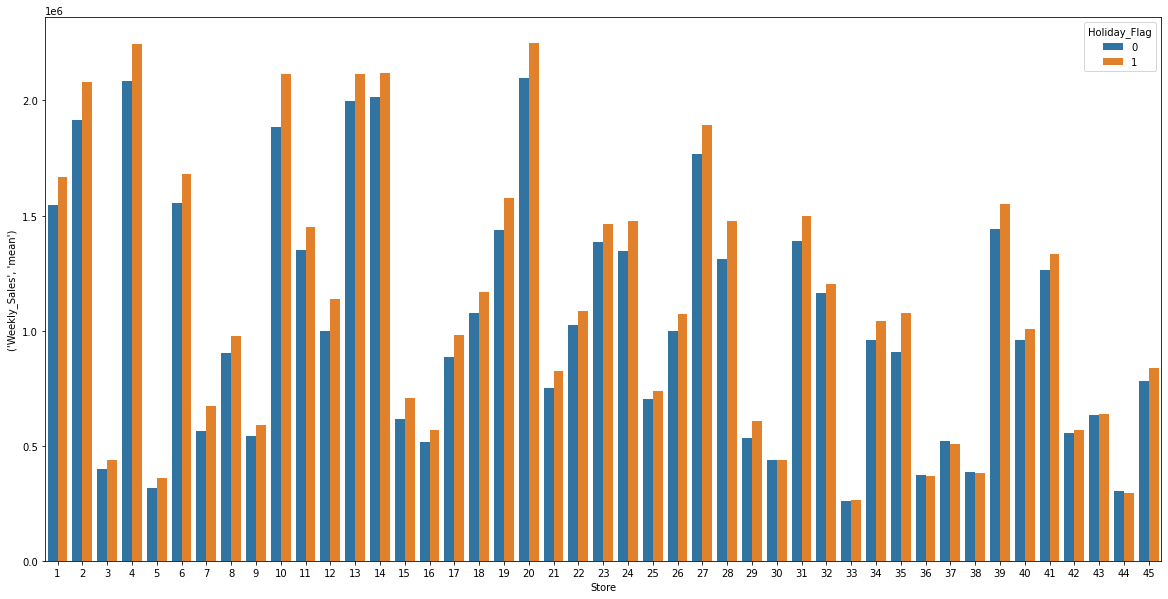

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Store',y = ('Weekly_Sales',  'mean'),hue= 'Holiday_Flag',data=Store_new)
plt.show()

Inference:


*   People generally tend to spend more during holiday weeks
*   The average spending is more during holiday weeks than normal weeks



 Features vs Weekly sales

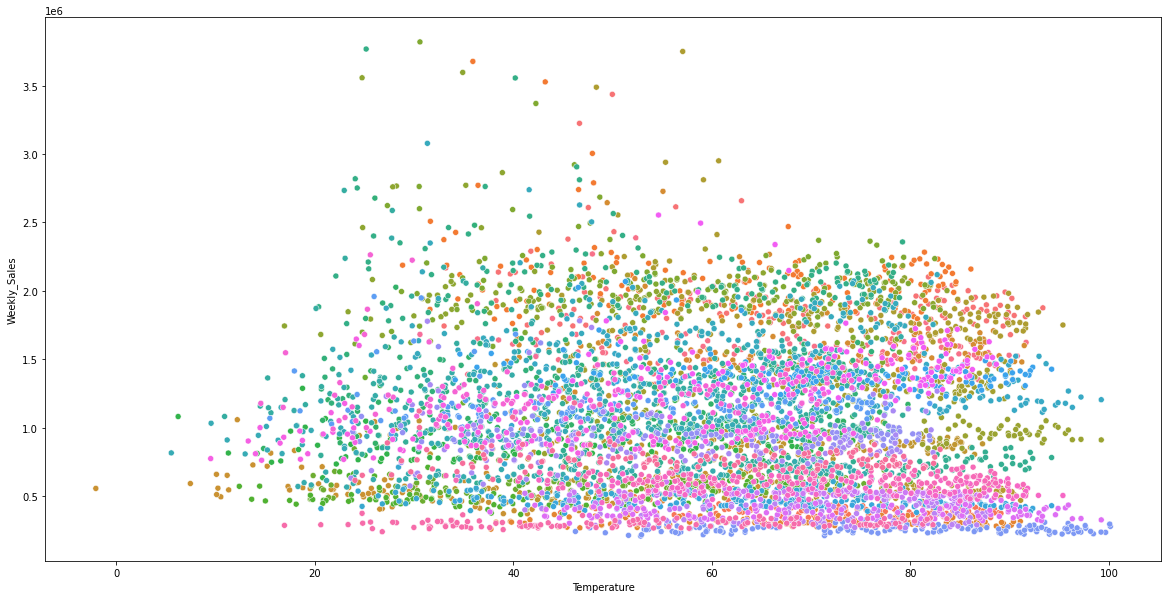

In [ ]:
# Temparature vs Weekly Sales
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Temperature',y = 'Weekly_Sales',hue = 'Store',data = dataframe,legend = False)
plt.show()

##### From above data we can say that temperature doesnot have much impact on Sales.

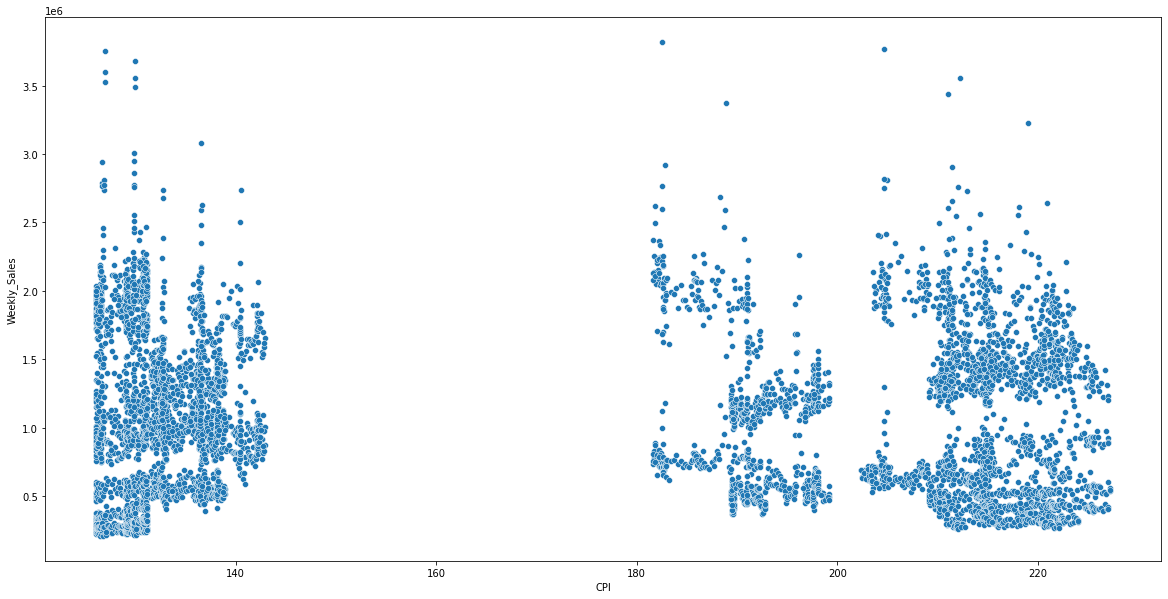

In [ ]:
# CPI vs Weekly Sales
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'CPI',y = 'Weekly_Sales',data = dataframe,legend = False)
plt.show()

Again no any significant pattern can be found.

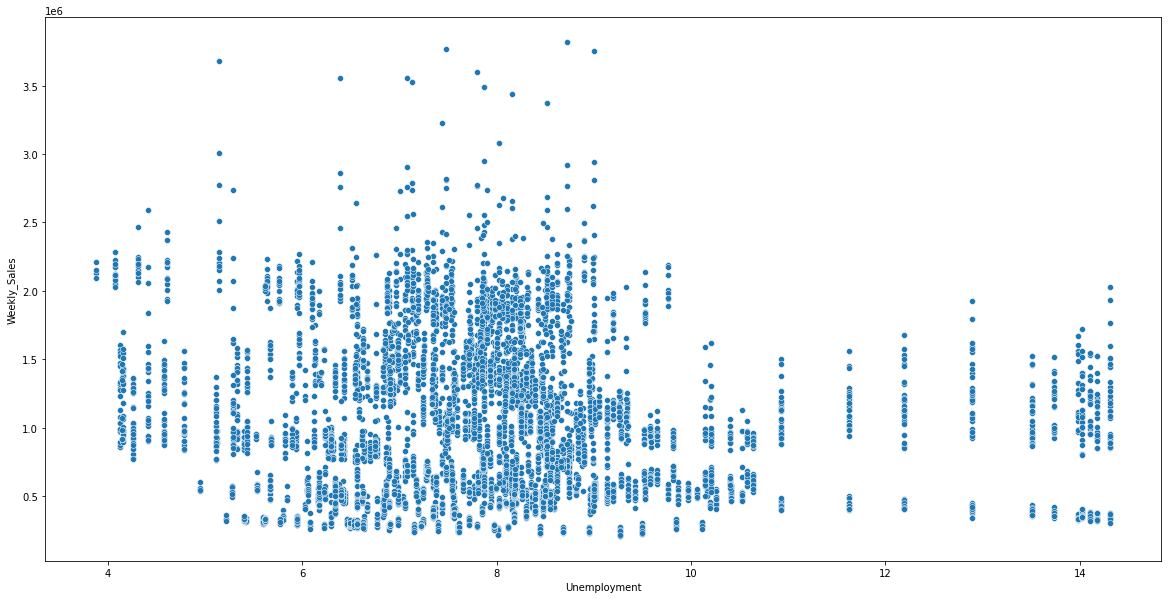

In [ ]:
# Unemployment vs Week_sales
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Unemployment',y = 'Weekly_Sales',data = dataframe,legend = False)
plt.show()

Again no any significant pattern can be found.

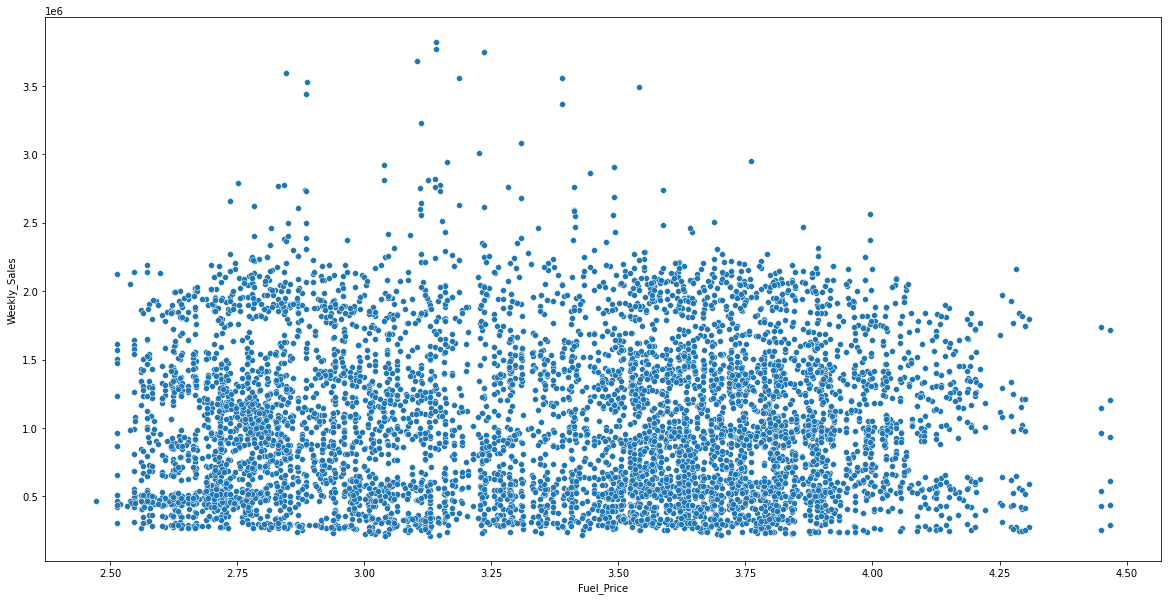

In [ ]:
# Fuel Price vs Week_sales
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Fuel_Price',y = 'Weekly_Sales',data = dataframe,legend = False)
plt.show()

Checking distribution of numerical features

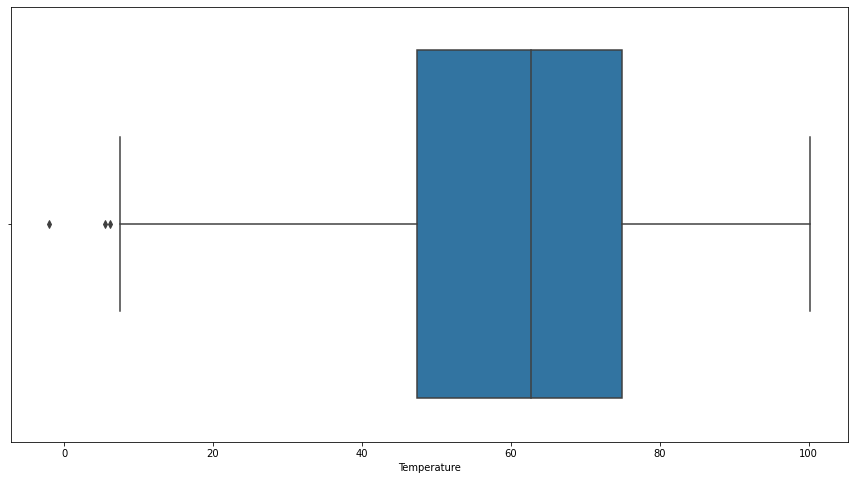

In [ ]:
# Temperature
fig, axs = plt.subplots( figsize=(15, 8))
sns.boxplot(x = dataframe['Temperature'])
plt.show()

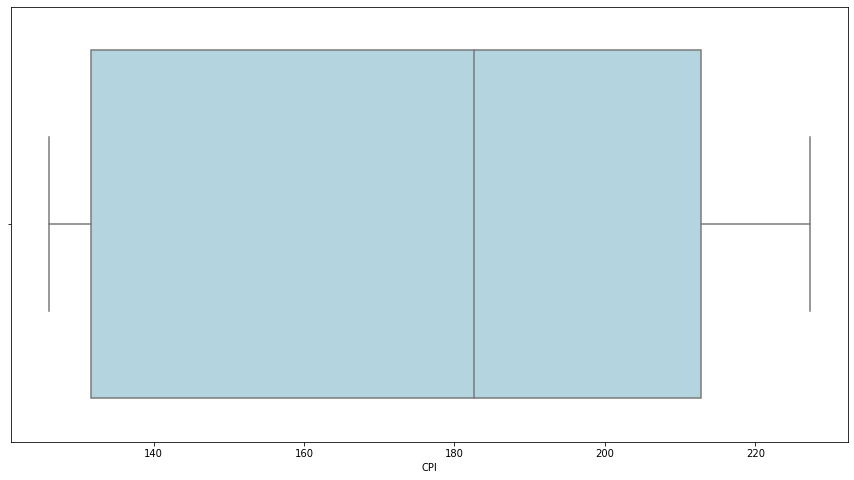

In [ ]:
# CPI
fig, axs = plt.subplots( figsize=(15, 8))
sns.boxplot(x = dataframe['CPI'], color='lightblue')
plt.show()

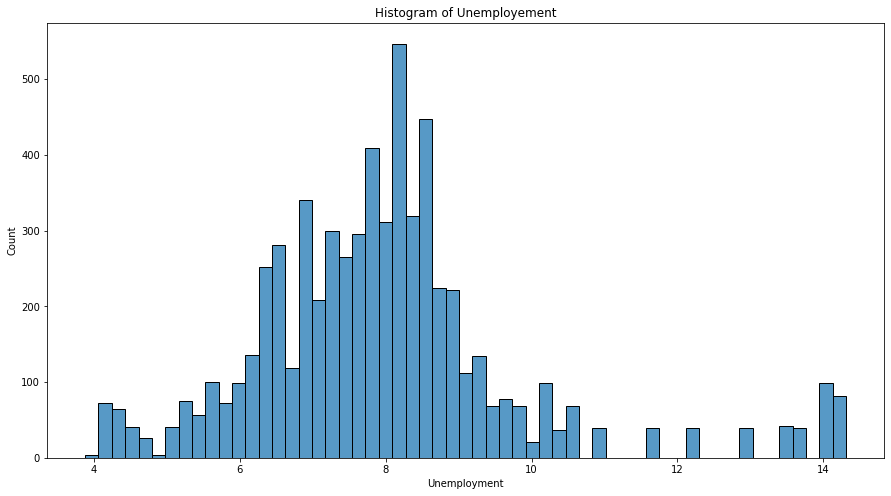

In [ ]:
# Unemployement
plt.figure(figsize=(15,8))
sns.histplot(x = 'Unemployment',data = dataframe)
plt.title("Histogram of Unemployement")
plt.show()

## Data PreProcessing

In [ ]:
dataframe.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
4130,29,2012-06-07,578832.41,0,77.41,3.538,138.229633,9.419,2012,6
4410,31,2012-05-25,1397094.26,0,79.49,3.561,221.382803,6.891,2012,5
4411,31,2012-01-06,1404516.29,0,79.24,3.501,221.385275,6.891,2012,1
5640,40,2011-04-22,965056.40,0,39.32,3.919,134.357100,4.781,2011,4
4658,33,2011-02-09,239198.36,0,99.20,3.798,129.325936,8.442,2011,2


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   year          6435 non-null   int64         
 9   month         6435 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(5), int64(2)
memory usage: 416.4 KB


In [ ]:
# Adding dummy variables for Categorical features
dataframe_dummies = pd.get_dummies(dataframe,columns=['Store','Holiday_Flag'])
print(dataframe_dummies.columns.to_list())

['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1']


### Now Using Sklearn (Linear Regression)

Here, We split our data into two sets: one data set for training and another one that we will use at the end to test our model.

1. Import the function train_test_split from sklearn.model_selection
2. Split our df in X made of all features except Date,Weekly_Sales and y made of the feature Weekly_Sales
3. Use train_test_split with a test_size=0.20 (20 % of inputs became the test set) in following way to obtain a train set and a test set.

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X = dataframe_dummies.drop(['Date','Weekly_Sales'],axis=1)
y = dataframe_dummies.Weekly_Sales

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Now Predicting the model

In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

Now a dataframe of actual and predicted value is created.

In [ ]:
dataframe_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataframe_new.head()

,Actual,Predicted
2436,1138800.32,1166587.0
3361,1304850.67,1345989.0
233,1769296.25,1993758.0
3667,1077640.13,1084453.0
5011,428851.99,342061.0


Now checking mean of actual and predicted data

In [ ]:
print(f"{y.mean()}")
y_pred.mean()

1046964.8775617732


1059389.6767676768

In [ ]:
from sklearn import metrics
print('Mean Absolute error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error
                                           (y_test,y_pred)))

Mean Absolute error:  97293.14956487955
Mean Squared Error:  24387910452.358746
Root Mean Squared Error:  156166.29102453176


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


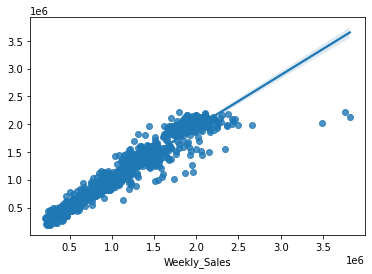

In [ ]:
sns.regplot(y_test,y_pred)
plt.show()

Finally, we calculate the accuracy of the model also commonly known as r2_squared. It represents the
proportion of the variance for a dependent variable that's explained by an independent variable or
variables in a regression model.


In [ ]:
# variance score: 1 means perfect prediction
print(f"The variance score is: {lr.score(X_test,y_test)}")

The variance score is: 0.9242974859596167


The model is 92.42% accurate.